# Projeto 2 - Ciência dos Dados 2020.2

**Participantes**

- Enrico Lopez Borges de Carvalho

- Luana Mitsudo Coelho

- Luiza Valezim Augusto Pinto

- Rodrigo Carvalho Monteiro de Barros

## Introdução

Esse Projeto tem como objetivo tentar prever a nota que diversos jogos receberiam no site *Metacritic*, um site de avaliação de jogos. Para isso, foram levadas em consideração suas características principais (como seu preço, seu gênero, entre outros), informações obtidas em um datasheet do site *Kaggle* em forma de Excel. <br>
Foram selecionadas somente àquelas colunas de características que interessavam para o resultado da previsão.  <br>
O método utilizado foi **INSERIR O NOME DO MÉTODO QUE IREMOS UTILIZAR**, o qual (...)

## Desenvolvimento

**Carregando as bibliotecas**

In [15]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

#biblioteca de decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression

from IPython.display import display

**Carregando a base de dados dos jogos**

In [16]:
filename = 'Games.xlsx'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com o projeto!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()} :(')

Encontrei o arquivo Games.xlsx, tudo certo para prosseguir com o projeto!


**Lendo os arquivos de treinamento e de teste**

In [17]:
#cria o dataframe a partir da tabela excel
games =  pd.read_excel(filename)

#retira colunas não desejadas do dataframe
jogos = games.drop('Column1',axis=1).drop('id',axis=1).drop('RawgID',axis=1).drop('SteamURL',axis=1).drop('Graphics',axis=1) \
            .drop('Storage',axis=1).drop('Memory',axis=1).drop('RatingsBreakdown',axis=1).drop('ReleaseDate',axis=1)\
            .drop('Soundtrack',axis=1).drop('Franchise',axis=1).drop('DiscountedCost',axis=1).drop('Controller',axis=1)\
            .drop('ESRB',axis=1).drop('Publisher',axis=1).drop('Description',axis=1).drop('Tags',axis=1).copy()

In [18]:
#retira linhas com dados faltando do dataframe.
jogos = jogos.dropna()
jogos = jogos.reset_index(drop=True) # correção necessaria para reorganizar as

jogos

Name  \
0                                                         Counter-Strike: Global Offensive   
1                                                                                Destiny 2   
2                                                                 The Elder Scrolls Online   
3                                                                           Sea of Thieves   
4                                                           Tom Clancy's Rainbow Six Siege   
5                                                                            Rocket League   
6                                                                         Dead by Daylight   
7                                                                                     Rust   
8                                                                       Grand Theft Auto V   
9                                                        Halo: The Master Chief Collection   
10                                                           Sid Meierâ€™s Civilization VI   
11                                                                                Warframe   
12                                                                   Monster Hunter: World   
13                                                                   Red Dead Redemption 2   
14                                                                     Black Desert Online   
15                                                                                   SMITE   
16                                                                                 F1 2020   
17                                                                           Path of Exile   
18                                                                        Persona 4 Golden   
19                                                                               Stellaris   
20                                                                              The Sims 4   
21                                                                           Borderlands 3   
22                                             The Elder Scrolls V: Skyrim Special Edition   
23                                                                         Team Fortress 2   
24                                                                              Fallout 76   
25                                                                                NBA 2K20   
26                                                                 Total War: WARHAMMER II   
27                                                                   ARK: Survival Evolved   
28                                           Divinity: Original Sin 2 - Definitive Edition   
29                                                                                Terraria   
30                                                                       World of Warships   
31                                                                           Disco Elysium   
32                                                                        Cities: Skylines   
33                                                                          Stardew Valley   
34                                                                             Titanfall 2   
35                                                             Call of Duty: Black Ops III   
36                                                                 Remnant: From the Ashes   
37                                                                Assassin's Creed Odyssey   
38                                                                          Hunt: Showdown   
39                                                                   Europa Universalis IV   
40                                                 Command & Conquer Remastered Collection   
41                            SpongeBob SquarePants: Battle for Bikini Bottom - Rehydrated   
42                                          

# Formatando Datasheet para trabalhar.

Algumas colunas do Datasheet obtido não estavam em um formato favorável para a manupilação em pandas, portanto, foram necessarias algumas alterações nas colunas: "Genres, "Platform", "Players" e "Languages".Essas colunas possuiam informações em formato de listas com diferentes atributos cada, e foi necessario transformalos em valores numericos ou categoricos, mais simples de manipular com o Pandas e com o Sklearn. 

### Dividindo a coluna "Languages"
A coluna apresentava, para cada jogo, uma lista de linguas em que o mesmo era disponibilizado. O código abaixo lê cada linha dessa coluna e substitui a lista em texto pelo numero de linguas disponiveis.

In [19]:
#transforma a coluna "Laguages" de uma lista de linguas para uma quantidade de linguas disponiveis
for L in range(len(jogos.Languages)):
    lista_linguas = str(jogos.Languages[L]).split(",")
    jogos.Languages[L] = len(lista_linguas)

jogos

C:\Users\rodri\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Name  \
0                                                         Counter-Strike: Global Offensive   
1                                                                                Destiny 2   
2                                                                 The Elder Scrolls Online   
3                                                                           Sea of Thieves   
4                                                           Tom Clancy's Rainbow Six Siege   
5                                                                            Rocket League   
6                                                                         Dead by Daylight   
7                                                                                     Rust   
8                                                                       Grand Theft Auto V   
9                                                        Halo: The Master Chief Collection   
10                                                           Sid Meierâ€™s Civilization VI   
11                                                                                Warframe   
12                                                                   Monster Hunter: World   
13                                                                   Red Dead Redemption 2   
14                                                                     Black Desert Online   
15                                                                                   SMITE   
16                                                                                 F1 2020   
17                                                                           Path of Exile   
18                                                                        Persona 4 Golden   
19                                                                               Stellaris   
20                                                                              The Sims 4   
21                                                                           Borderlands 3   
22                                             The Elder Scrolls V: Skyrim Special Edition   
23                                                                         Team Fortress 2   
24                                                                              Fallout 76   
25                                                                                NBA 2K20   
26                                                                 Total War: WARHAMMER II   
27                                                                   ARK: Survival Evolved   
28                                           Divinity: Original Sin 2 - Definitive Edition   
29                                                                                Terraria   
30                                                                       World of Warships   
31                                                                           Disco Elysium   
32                                                                        Cities: Skylines   
33                                                                          Stardew Valley   
34                                                                             Titanfall 2   
35                                                             Call of Duty: Black Ops III   
36                                                                 Remnant: From the Ashes   
37                                                                Assassin's Creed Odyssey   
38                                                                          Hunt: Showdown   
39                                                                   Europa Universalis IV   
40                                                 Command & Conquer Remastered Collection   
41                            SpongeBob SquarePants: Battle for Bikini Bottom - Rehydrated   
42                                          

### Dividindo as colunas "Players", "Genders" e "Platform" e criando novas colunas
As colunas "Players", "Genders" e "Platform" apresentavam uma lista de modos de jogo em que o mesmo era disponibilizado, os generos nos quais o jogo se encaixa e as plataformas em que ele está disponivel, respectivamente. 
O código abaixo lê cada uma dessas colunas, e cria uma coluna, com valores boleanos, para cada opção das categorias de cada coluna.

In [20]:
#Genres
textog=",".join(jogos.Genres)
textog=textog.split(",")
lista_gen=[]
for el in textog:
    if el not in lista_gen and el[0]!=" ":
        lista_gen.append(el)
print(lista_gen)

for elem in lista_gen:
    filtrod=jogos.Genres.str.contains(f"{elem}")
    jogos.loc[filtrod,f"{elem}"]=filtrod

['Action', 'Massively Multiplayer', 'Strategy', 'Racing', 'RPG', 'Simulation', 'Casual', 'Adventure', 'Indie', 'Free to Play', 'Sports']


In [21]:
#Platform
textplat=",".join(jogos.Platform)
textplat=textplat.split(",")
lista_plat=[]
for el in textplat:
    if el not in lista_plat and el[0]!=" ":
        lista_plat.append(el)
print(lista_plat)

for ele in lista_plat:
    filtrodd=jogos.Platform.str.contains(f"{ele}")
    jogos.loc[filtrodd,f"{ele}"]=filtrodd

['PC', 'PlayStation 5', 'PlayStation 4', 'Linux', 'Xbox One', 'Xbox Series X', 'macOS', 'Android', 'iOS', 'Nintendo Switch', 'PlayStation 3', 'Xbox 360', 'Nintendo 3DS', 'GameCube', 'SNES', 'PS Vita', 'Nintendo DS', 'PlayStation 2', 'Xbox', 'Dreamcast', 'Wii', 'PlayStation', 'Web', 'Wii U', 'Game Boy Advance']


In [22]:
#Players
textplayers=",".join(jogos.Players)
textplayers=textplayers.split(",")
lista_players=[]
for el in textplayers:
    if el not in lista_players and el[0]!=" ":
        lista_players.append(el)
print(lista_players)

for ele in lista_players:
    filtroddd=jogos.Players.str.contains(f"{ele}")
    jogos.loc[filtroddd,f"{ele}"]=filtroddd

['multiplayer', 'singleplayer', 'coop', 'pvp', 'online coop']


In [23]:
del jogos["Players"]
del jogos["Genres"]
del jogos["Platform"]

jogos

Name  \
0                                                         Counter-Strike: Global Offensive   
1                                                                                Destiny 2   
2                                                                 The Elder Scrolls Online   
3                                                                           Sea of Thieves   
4                                                           Tom Clancy's Rainbow Six Siege   
5                                                                            Rocket League   
6                                                                         Dead by Daylight   
7                                                                                     Rust   
8                                                                       Grand Theft Auto V   
9                                                        Halo: The Master Chief Collection   
10                                                           Sid Meierâ€™s Civilization VI   
11                                                                                Warframe   
12                                                                   Monster Hunter: World   
13                                                                   Red Dead Redemption 2   
14                                                                     Black Desert Online   
15                                                                                   SMITE   
16                                                                                 F1 2020   
17                                                                           Path of Exile   
18                                                                        Persona 4 Golden   
19                                                                               Stellaris   
20                                                                              The Sims 4   
21                                                                           Borderlands 3   
22                                             The Elder Scrolls V: Skyrim Special Edition   
23                                                                         Team Fortress 2   
24                                                                              Fallout 76   
25                                                                                NBA 2K20   
26                                                                 Total War: WARHAMMER II   
27                                                                   ARK: Survival Evolved   
28                                           Divinity: Original Sin 2 - Definitive Edition   
29                                                                                Terraria   
30                                                                       World of Warships   
31                                                                           Disco Elysium   
32                                                                        Cities: Skylines   
33                                                                          Stardew Valley   
34                                                                             Titanfall 2   
35                                                             Call of Duty: Black Ops III   
36                                                                 Remnant: From the Ashes   
37                                                                Assassin's Creed Odyssey   
38                                                                          Hunt: Showdown   
39                                                                   Europa Universalis IV   
40                                                 Command & Conquer Remastered Collection   
41                            SpongeBob SquarePants: Battle for Bikini Bottom - Rehydrated   
42                                          

### Descrição das variaveis da tabela final:
 
 **Name:** Nome do jogo.
 
 **Metacritic:** Nota dada pelo site Metacritic até 1000 pontos, sendo, quanto maior, melhor.
 
 **Genres:** Gêneros em que o jogo pode ser classificado.
 
 **Indie:** Se o jogo se classifica como Indie ou não (0 significa que não e 10 significa que sim).
 
 **Presence:** Quantas vezes foi mencionado nas redes sociais (pode ser lido também como relevância).
 
 **Platform:** Plataformas disponíveis do jogo.
 
 **OriginalCost:** Preço (em dólares americanos) do jogo na data de lançamento.
 
 **Players:** Modos de jogo disponíveis para o jogo ser jogado.
 
 **Languages:** Quantidade de línguas disponíveis do jogo.
 
 **Achievements:** Quantidade de conquistas disponíveis para o jogador conseguir durante o jogo (pode demonstrar sua complexidade).

### Gráficos

**Quantidade por faixa de preço**

Text(0.5, 1.0, 'Quantidade de jogos por preço do jogo na data de lançamento ')

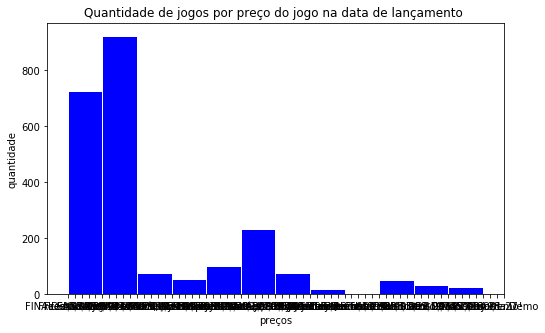

In [24]:
preco_inicial=jogos.OriginalCost

faixas = np.arange(0,65,5)

plt.figure(figsize=(18, 5))

plt.subplot(121)
plt.hist(preco_inicial, bins=faixas,color='blue', edgecolor='white')
plt.ylabel('quantidade')
plt.xlabel('preços')
plt.title('Quantidade de jogos por preço do jogo na data de lançamento ')

**Quantidade por nota do Metacritic**

Text(0.5, 1.0, 'Quantidade de jogos por nota do Metacritic')

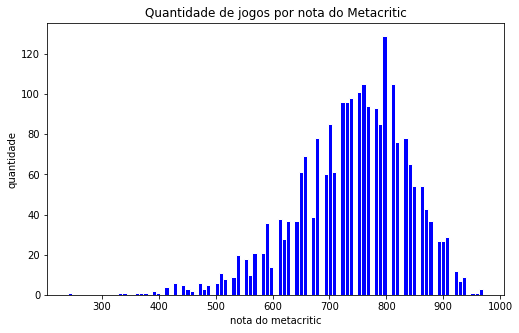

In [25]:
metacritic_inicial=jogos.Metacritic

faixas_metacritic = np.linspace(metacritic_inicial.min(),metacritic_inicial.max(),100)

plt.figure(figsize=(18, 5))

plt.subplot(121)
plt.hist(metacritic_inicial, bins=faixas_metacritic,color='blue', edgecolor='white')
plt.ylabel('quantidade')
plt.xlabel('nota do metacritic')
plt.title('Quantidade de jogos por nota do Metacritic')

**Nota do Metacritic por preço na data de lançamento, quantidade de achievements, quantidade de citações sobre o jogo na internet e**

Text(0, 0.5, 'nota do metacritic')

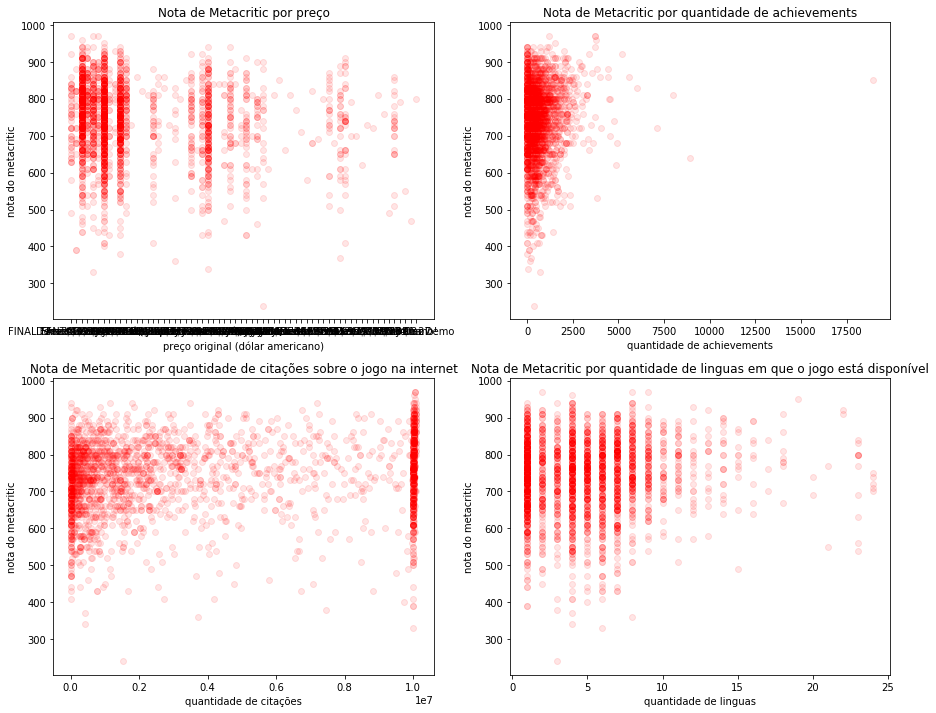

In [26]:
plt.figure(figsize=(15, 12))

plt.subplot(221)
plt.scatter(jogos.OriginalCost,jogos.Metacritic, c='red', alpha=0.1)
plt.title('Nota de Metacritic por preço')
plt.xlabel('preço original (dólar americano)')
plt.ylabel('nota do metacritic')

plt.subplot(222)
plt.scatter(jogos.Achievements,jogos.Metacritic, c='red', alpha=0.1)
plt.title('Nota de Metacritic por quantidade de achievements')
plt.xlabel('quantidade de achievements')
plt.ylabel('nota do metacritic')

plt.subplot(223)
plt.scatter(jogos.Presence,jogos.Metacritic, c='red', alpha=0.1)
plt.title('Nota de Metacritic por quantidade de citações sobre o jogo na internet')
plt.xlabel('quantidade de citações')
plt.ylabel('nota do metacritic')

plt.subplot(224)
plt.scatter(jogos.Languages,jogos.Metacritic, c='red', alpha=0.1)
plt.title('Nota de Metacritic por quantidade de linguas em que o jogo está disponível')
plt.xlabel('quantidade de linguas')
plt.ylabel('nota do metacritic')

In [27]:
jogos = jogos.replace(np.nan, False, regex=True)
jogos.head(5)

Name  Metacritic Indie    Presence  \
0  Counter-Strike: Global Offensive       830.0     0  10095880.0   
1                         Destiny 2       820.0     0  10074250.0   
2          The Elder Scrolls Online       710.0     0  10007810.0   
3                    Sea of Thieves       680.0     0   7774560.0   
4    Tom Clancy's Rainbow Six Siege       750.0     0  10014240.0   

   OriginalCost  Languages  Achievements  Action  Massively Multiplayer  \
0  Free to Play         23        1790.0    True                  False   
1  Free To Play          8         610.0    True                  False   
2        $19.99          4           0.0   False                   True   
3        $39.99          5        3080.0    True                  False   
4        $19.99         12         820.0    True                  False   

   Strategy  ...    Wii  PlayStation    Web  Wii U  Game Boy Advance  \
0     False  ...  False         True  False  False             False   
1     False  ...  False         True   True  False             False   
2     False  ...  False        False  False  False             False   
3     False  ...  False        False  False  False             False   
4     False  ...  False         True  False  False             False   

   multiplayer  singleplayer  coop    pvp  online coop  
0         True         False  True   True         True  
1         True         False  True  False         True  
2         True          True  True  False        False  
3         True         False  True   True         True  
4         True          True  True  False         True  

[5 rows x 47 columns]

## Monstrinho

In [28]:
X = jogos.drop('Metacritic',axis=1).drop('Name',axis=1).copy()
y = jogos.Metacritic.copy()

X.dtypes

modelo = DecisionTreeRegressor()
modelo = modelo.fit(X, y)

plt.figure(figsize=(15, 12))
plot_tree(modelo, filled=True, rounded=True);

ValueError: could not convert string to float: 'Free to Play'

## Referências:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

video maravilindo sobre montar decision tree em python: <br>
https://www.youtube.com/watch?v=q90UDEgYqeI&ab_channel=StatQuestwithJoshStarmer